Mayra Diandra Nabila Ratnadi (3039839)

Michelle Espranita Liman (3072994)

In [1]:
from IPython.core.display import HTML
HTML("<style>" + open("style.css").read() + "</style>")

<div class="headline">
Language Technology / Sprachtechnologie
<br><br>
Wintersemester 2019/2020
</div>
<br>
<div class="description">
    Übung zum Thema <i id="topic">"Plagiarism / Authorship"</i>
    <br><br>
    Deadline Abgabe: <i #id="submission">Thursday, 28.11.2019 (23:55 Uhr)</i>
</div>

# Präsenzübung

In [1]:
import nltk
from nltk.probability import FreqDist
from nltk.corpus import inaugural, brown, shakespeare, genesis, gutenberg
from nltk.book import*

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Warm-up

<div class="task_description">
    <i class="task">Task 6.1:</i> <br>
</div>

When we want to analyse the typical fingerprint of writers, we are often interested in features that are independent from a specific genre or topic.
 
Which of the following features do you think are most topic-dependent and why?
* Most frequent verbs
* Most frequent prepositions
* Most frequent named entities
* Most frequent pronouns

## Type-Token Ratio

<div class="task_description">
    <i class="task">Task 6.2:</i> <i class="l3">L3</i><br>
</div>
Type-Token-Ratio is a measure of lexical diversity and computed by dividing the number of different types by the overall number of tokens in a text. <br> Implement a method that computes the type-token-ratio for an input text.
What happens if you apply this method to the first 100, 500, 1000, 2000, 10000 and 20000 word in Romeo and Julia (Shakespeare corpus)? <br> Can you explain your observation?
Discuss what you could do about it.

In [3]:
def computeTTR(numberOfWords):
    fd = nltk.FreqDist(w1 for w1 in shakespeare.words('r_and_j.xml')[:numberOfWords])
    tokens = fd.N()
    types = fd.B()
    print(tokens, '\t', types, '\t' + str(types/tokens))
    
computeTTR(100)
computeTTR(500)
computeTTR(1000)
computeTTR(2000)
computeTTR(10000)
computeTTR(20000)

100 	 69 	0.69
500 	 244 	0.488
1000 	 371 	0.371
2000 	 686 	0.343
10000 	 2031 	0.2031
20000 	 3076 	0.1538


<div class="task_description">
    <i class="task">Task 6.3:</i> <br>
</div>

<div class="task_description">
   <i class="subtask">6.3.1</i> <i class="l1">L1</i> <br>
</div>

Take a look at the function below. If executed, what will be the output?

In [2]:
words = [w for w in brown.words() if w.startswith('en')]
print(FreqDist(words).most_common(10))

[('enough', 426), ('end', 400), ('entire', 149), ('entered', 98), ('energy', 96), ('entirely', 90), ('enemy', 87), ('enter', 78), ('ends', 67), ('ended', 59)]


<div class="task_description">
   <i class="subtask">6.3.2</i> <i class="l2">L2</i> <br>
</div>

Change the function above to that it gets the ten most frequent words from the corpus that start with the prefix ”en”, end with the suffix ”ed” and are at least five characters long. Moreover, it should not matter if the word is written in upper or lower case (”Ended” and ”ended” should be regarded as the same word)!

In [6]:
words = [w.lower() for w in brown.words() if w.lower().startswith('en') and w.lower().endswith('ed') and len(w) >= 5]
print(FreqDist(words).most_common(10))

[('entered', 98), ('ended', 60), ('enjoyed', 57), ('entitled', 56), ('engaged', 47), ('encountered', 30), ('encouraged', 29), ('enforced', 20), ('enacted', 12), ('enabled', 12)]


<div class="task_description">
   <i class="subtask">6.3.3</i> <i class="l3">L3</i> <br>
</div>

Using the Brown corpus, find all words that consist of two other words that are at least 5 characters long, e.g.”storehouse”, but not “infrequent” (in + frequent), as “in” is only 2 characters long. Can you think of an improvement that finds surprising ones like “horizontally” (horizon + tally) instead of normal compositions like “storehouse” (store + house)?

In [13]:
words = FreqDist([w.lower() for w in brown.words() if len(w) >= 5])
for token in words.keys():
    for start in words.keys():
        if token.startswith(start):
            rest = token[len(start):len(token)]
            for end in words.keys():
                if rest == end:
                    print(token, '\t', start, '\t', end)

KeyboardInterrupt: 

## Morphological Analysis

<div class="task_description">
    <i class="task">Task 6.4:</i> <br>
</div>


An important problem in computational linguistics is morphological analysis.<br> This consists of breaking down a word into its component pieces, for example losses might be broken down as loss + es. In English, morphology is relatively simple and is mostly comprised of prefixes and suffixes. To get an idea of what suffixes are common in English (and thus could be morphemes), we can look at the frequencies of the last two characters of sufficiently long words.

<div class="task_description">
   <i class="subtask">6.4.1</i> <i class="l1">L1</i> <br>
</div>

Take a look at the function below. Why is it not suitable for finding the most frequent two-character suffixes in a corpus?

In [ ]:
suffixes = [w.lower() for w in brown.words() if w.lower().endswith('en') or w.lower().endswith('ly')]
print(FreqDist(suffixes).max())

<div class="task_description">
   <i class="subtask">6.4.2</i> <i class="l2">L2</i> <br>
</div>

Improve the function above so that only token with a length of at least five characters are taken into consideration.

In [ ]:
suffixes = [w.lower() for w in brown.words() if (w.lower().endswith('en') or w.lower().endswith('ly')) and len(w) >= 5]
print(FreqDist(suffixes).max())

<div class="task_description">
   <i class="subtask">6.4.3</i> <i class="l3">L3</i> <br>
</div>

Improve the function further so that it returns the 20 most frequent two-character suffixes from words with at least five characters from a corpus. <br>
As a sanity test, you may want test your function on the words in Sense and Sensibility. If you pass the words of a novel (or any sufficiently large English document) as the argument to your function, you should see some common English suffixes in the output. 

In [ ]:
words = FreqDist([w[-2:] for w in text2 if len(w) >= 5])
print(words.most_common(20))

## Readability Measures

<div class="task_description">
    <i class="task">Task 6.5:</i> <br>
</div>

Readability measures are used to score the reading difficulty of a text, for the purposes of selecting texts of
appropriate difficulty for language learners. <br>
The Automated Readability Index (ARI) of a text is defined to be:<br>
``ARI = 4.71μw + 0.5μs − 21.43``
Where ``μw`` is the average number of letters per word, and ``μs`` is the average number of words per sentence, in a given text. <br>
As a rough guide, a score of 1 corresponds to the reading level at an age of 6 to 8, a score of 8 corresponds to the typical reading level of a 14 year-old US child. A score of 12 corresponds to the reading level of a 17 year-old.

<div class="task_description">
   <i class="subtask">6.5.1</i> <i class="l1">L1</i> <br>
</div>

What does the function below compute?

In [ ]:
def calculate_readability(sentences):
    sentCount = len(sentences)
    wordCount = 0
    charCount = 0
    
    print(sentCount)

calculate_readability(brown.sents())

--> It counts the number of sentences

<div class="task_description">
   <i class="subtask">6.5.2</i> <i class="l2">L2</i> <br>
</div>

Enhance the function above so that the number of words is added up in the variable wordCount (if you got two sentences, one with 5 words, one with 8, wordCount should be 13).

In [14]:
def calculate_readability(sentences):
    sentCount = len(sentences)
    wordCount = 0
    for sent in sentences:
        wordCount += len(sent)
    charCount = 0
    
    print(sentCount)
    print(wordCount)

calculate_readability(brown.sents())

57340
1161192


<div class="task_description">
   <i class="subtask">6.5.3</i> <i class="l2">L2</i> <br>
</div>

Enhance the function again, so that in charCount the number of characters from each word is added up.

In [15]:
def calculate_readability(sentences):
    sentCount = len(sentences)
    wordCount = 0
    for sent in sentences:
        wordCount += len(sent)
    charCount = 0
    for sent in sentences:
        for word in sent:
            charCount += len(word)
    
    print(sentCount)
    print(wordCount)
    print(charCount)

calculate_readability(brown.sents())

57340
1161192
4965882


<div class="task_description">
   <i class="subtask">6.5.4</i> <i class="l3">L3</i> <br>
</div>

Now change your function, so that it returns a double with the value of the ARI score of the corpus (Hint: print is not a return statement). Then compute the ARI score of the Brown corpus.

In [18]:
def calculate_readability(sentences):
    sentCount = len(sentences)
    wordCount = 0
    for sent in sentences:
        wordCount += len(sent)
    charCount = 0
    for sent in sentences:
        for word in sent:
            charCount += len(word)
    
    ari = 4.71*(charCount/wordCount) + 0.5*(wordCount/sentCount) - 21.43
    return ari
            
print("Brown Corpus ARI:", calculate_readability(brown.sents()))

Brown Corpus ARI: 8.837992178150564


<div class="task_description">
   <i class="subtask">6.5.5</i> <i class="l3">L3</i> <br>
</div>

Use the inaugural corpus and compare it to the Brown corpus to prove the hypothesis: “Speeches are easier to understand than news.”

In [19]:
print("Inaugural Corpus ARI:", calculate_readability(inaugural.sents()))
print("Brown (News) Corpus ARI:", calculate_readability(brown.sents(categories="news")))

Inaugural Corpus ARI: 14.201202351839129
Brown (News) Corpus ARI: 10.176684595052684


<div class="task_description">
   <i class="subtask">6.5.6</i> <i class="l3">L3</i> <br>
</div>

Compute the readability score of all inaugural speeches. Plot it. Discuss the changes over time.

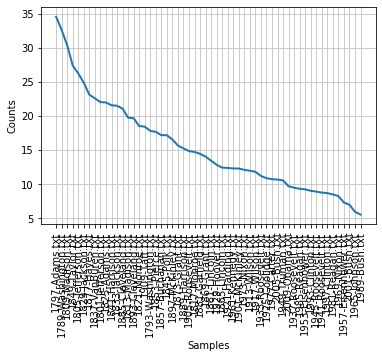

In [21]:
ARI_scores = nltk.FreqDist() # an alternative to condfreqdist
for fileid in inaugural.fileids():
    ARI_scores[fileid] = calculate_readability(inaugural.sents(fileid))
ARI_scores.plot() # automatically orders the files in descending order of frequency

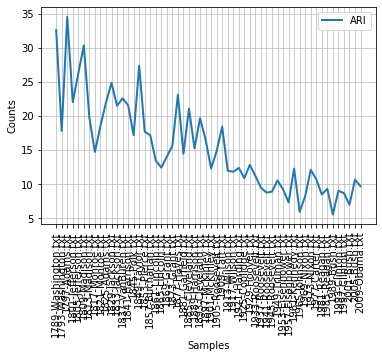

In [22]:
ARI_scores = nltk.ConditionalFreqDist()
for fileid in inaugural.fileids():
    ARI_scores['ARI'][fileid] = calculate_readability(inaugural.sents(fileid))
ARI_scores.plot()

<div class="task_description">
    <i class="task">Task 6.6.:</i> <br>
</div>

<div class="task_description">
   <i class="subtask">6.6.1.</i> <i class="l1">L1</i> <br>
</div>

Look at the code below. Describe what the function does.

In [ ]:
def mostCommon(n):
    mc = FreqDist(text1) # text1 is Moby Dick
    words = []
    for m in mc.most_common(n):
        if len(m[0]) ==3:
            words.append(m)
    return words

mostCommon(50)

--> Takes only the 3-letter-long words from the 50 most common words that appeared in Moby Dick

<div class="task_description">
   <i class="subtask">6.6.2</i> <i class="l2">L2</i> <br>
</div>

Take a look at the code below. Enhance the function shorten (c,n,part) to process a text, omitting the n most frequently occurring words of the text.

In [26]:
# Corpuses are a list of words
moby = text1
sense = text2
chat = text5
def shorten(c,n,part):#(corpus, number, test on)
    mc = FreqDist(c) # text1 is Moby Dick
    mostCommon = [w[0] for w in mc.most_common(n)]
    words = []
    for m in part:
        if m not in mostCommon:
            words.append(m)
    return words
    
print("moby:", shorten(moby, 100, moby[40:75]))
print("sense:", shorten(sense, 100, sense[50:100]))
print("chat:", shorten(sense, 100, chat[100:140]))

moby: ['He', 'ever', 'dusting', 'lexicons', 'grammars', 'queer', 'handkerchief', 'mockingly', 'embellished', 'gay', 'flags', 'known', 'nations', 'world', 'He', 'loved']
sense: ['lived', 'respectable', 'manner', 'engage', 'general', 'good', 'opinion', 'surrounding', 'acquaintance', 'late', 'owner', 'estate', 'single', 'man', 'lived', 'advanced', 'age', 'many', 'years', 'life', 'constant', 'companion']
chat: ['cousin', 'drew', 'messed', 'up', 'pic', 'cast', 'PART', '24', '/', 'm', 'boo', '26', '/', 'm', 'sexy', 'lol', 'U115', 'boo', 'JOIN', 'PART', 'drew', 'girl', 'legs', 'spread', 'boo', 'hope', 'didnt', 'draw']


<div class="task_description">
   <i class="subtask">6.6.3.</i> <i class="l3">L3</i> <br>
</div>

Enhance your code so that results not only for one but for various values of n (e.g. 10, 100, 500) are shown. Experiment with the values of n to find a useful limit for shortening a text.

In [28]:
for x in [10,100,500]:    
    print("moby:", shorten(moby, x, moby[40:75]))
    print("sense:", shorten(sense, x, sense[50:100]))
    print("chat:", shorten(sense, x, chat[100:140]))
    print()

moby: ['now', 'He', 'was', 'ever', 'dusting', 'his', 'old', 'lexicons', 'grammars', 'with', 'queer', 'handkerchief', 'mockingly', 'embellished', 'with', 'all', 'gay', 'flags', 'all', 'known', 'nations', 'world', 'He', 'loved']
sense: ['lived', 'so', 'respectable', 'manner', 'as', 'engage', 'general', 'good', 'opinion', 'their', 'surrounding', 'acquaintance', 'The', 'late', 'owner', 'this', 'estate', 'was', 'single', 'man', 'who', 'lived', 'very', 'advanced', 'age', 'who', 'for', 'many', 'years', 'his', 'life', 'had', 'constant', 'companion']
chat: ['my', 'cousin', 'drew', 'messed', 'up', 'pic', 'on', 'my', 'cast', 'PART', '24', '/', 'm', 'boo', '26', '/', 'm', 'sexy', 'lol', 'U115', 'boo', 'JOIN', 'PART', 'he', 'drew', 'girl', 'with', 'legs', 'spread', 'boo', 'hope', 'he', 'didnt', 'draw']

moby: ['He', 'ever', 'dusting', 'lexicons', 'grammars', 'queer', 'handkerchief', 'mockingly', 'embellished', 'gay', 'flags', 'known', 'nations', 'world', 'He', 'loved']
sense: ['lived', 'respectable

# Homework

In [5]:
import nltk
from nltk.corpus import shakespeare
from nltk.corpus import genesis
from nltk.corpus import gutenberg
from nltk.corpus import brown
from nltk import pos_tag
from nltk import word_tokenize
from nltk import sent_tokenize
from sklearn import datasets, svm, tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from nltk.book import*

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


<div class="task_description">
    <i class="task">6.1.</i> :::10 Homework points:::
</div>
In the following, you will try out existing features for authorship attribution and implement additional ones.

<div class="task_description">
   <i class="subtask">6.1.1</i> 
</div>

Consider the following code, it computes 3 different features. 
Can you tell what each feature computes?

In [6]:
def computeFeature1(text): # text is a list of words
    sum = 0
    for word in text:
        sum+= len(word)
    return sum/len(text)

--> computeFeature1() calculates the average length of characters in a token

In [7]:
def getRelevantCategories(text, num):
    taggedWordList = pos_tag(text)
    fd = nltk.FreqDist((t1, t2) for ((w1, t1), (w2, t2)) in nltk.bigrams(taggedWordList))
    res = []
    for (tag, freq) in fd.most_common(num): # tag is a tuple (t1, t2)
        print(tag)
        res.append(tag)
    return res

def computeFeature2(text, cats): # cats is "categories"
    taggedWordList = pos_tag(text)
    fd = nltk.FreqDist((t1, t2) for ((w1, t1), (w2, t2)) in nltk.bigrams(taggedWordList))
    res = []
    for cat in cats:
        res.append(fd.freq(cat))
    return res

In [8]:
getRelevantCategories(text1[0:100], 5)

('NNP', 'NNP')
('DT', 'NN')
('NN', ',')
('IN', 'DT')
('JJ', 'NNP')


[('NNP', 'NNP'), ('DT', 'NN'), ('NN', ','), ('IN', 'DT'), ('JJ', 'NNP')]

--> getRelevantCategories(text, num) outputs the *num* most common pairs of consecutive POS tags (according to Penn tagset) that appear in the *text*

In [9]:
relvCats = getRelevantCategories(text1[0:100], 5)
computeFeature2(text1[0:100], relvCats)

('NNP', 'NNP')
('DT', 'NN')
('NN', ',')
('IN', 'DT')
('JJ', 'NNP')


[0.050505050505050504,
 0.04040404040404041,
 0.04040404040404041,
 0.030303030303030304,
 0.020202020202020204]

--> computeFeature2() takes as parameters:
<ol>
    <li><i>cats</i>, which is a list of pairs of consecutive tags (called category, ex: ('NNP', 'NNP')) that we want to consider (We can get this list by using the function getRelevantCategories())
    <li><i>text</i>, which is the corpus that we want to consider
</ol>
    and returns for each category in the list <i>cats</i>, the percentage of how frequently that category occurs in the <i>text</i> in comparison to all categories that actually appear in the <i>text</i>, packed in a list

In [10]:
def computeFeature3(text):
    taggedWordList = pos_tag(text, tagset='universal')
    fd_tags = nltk.FreqDist(tag for (word, tag) in taggedWordList)
    fd_words = nltk.FreqDist(word for (word, tag) in taggedWordList)
    return fd_words.freq(';')/fd_tags.freq('.')
computeFeature3(text1)

0.1102059595658881

--> computeFeature3() calculates how many times the punctuation ';' occurs in *text*, divided by how many times words are categorized as puncutation (universal tag: '.') in *text*, as a percentage 

<div class="task_description">
   <i class="subtask">6.1.2</i> 
</div>

The following code can be used to try the features on an actual classification task.<br>
We extract features from either Shakespeare's Hamlet or Melville's Moby Dick and use them to train a classifer for distinguishing between the two authors. <br>
We create a new dataframe. <br>
We split each book into 300 segments with 100 tokens each. The author is the goldstandard label we want to predict.<br>
Note that for the second feature, we first need to determine which are the most frequent categories (of what we cannot tell you, because this is what you are supposed to figure that out :) ) in the data in general to be considered.

In [11]:
df = pd.DataFrame()
num = 300
numTokens = 100
numCategoriesToConsider = 5
df['GOLD'] = ["melville" for i in range(0,num)]+["shakespeare" for i in range(0,num)]
df['FEATURE1'] = [computeFeature1(gutenberg.words('melville-moby_dick.txt')[i*numTokens:(i+1)*numTokens]) for i in range(0,num)]+[computeFeature1(gutenberg.words('shakespeare-hamlet.txt')[i*numTokens:(i+1)*numTokens]) for i in range(0,num)]
allTexts = gutenberg.words('melville-moby_dick.txt')[:num*numTokens]+gutenberg.words('shakespeare-hamlet.txt')[num*numTokens]
tags = getRelevantCategories(allTexts, numCategoriesToConsider)
for f in range(0,numCategoriesToConsider):
    df['FEATURE2_'+str(f)] = [computeFeature2(gutenberg.words('melville-moby_dick.txt')[i*numTokens:(i+1)*numTokens], tags)[f] for i in range(0,num)]+[computeFeature2(gutenberg.words('shakespeare-hamlet.txt')[i*numTokens:(i+1)*numTokens], tags)[f] for i in range(0,num)]
df['FEATURE3'] = [computeFeature3(gutenberg.words('melville-moby_dick.txt')[i*numTokens:(i+1)*numTokens]) for i in range(0,num)]+[computeFeature3(gutenberg.words('shakespeare-hamlet.txt')[i*numTokens:(i+1)*numTokens]) for i in range(0,num)]

('DT', 'NN')
('IN', 'DT')
('NN', 'IN')
('JJ', 'NN')
('NN', ',')


In [12]:
# We can inspect what the features look like
print(df[290:310])

            GOLD  FEATURE1  FEATURE2_0  FEATURE2_1  FEATURE2_2  FEATURE2_3  \
290     melville      3.74    0.020202    0.030303    0.010101    0.040404   
291     melville      3.84    0.050505    0.050505    0.010101    0.060606   
292     melville      3.93    0.020202    0.020202    0.020202    0.070707   
293     melville      3.68    0.050505    0.040404    0.010101    0.040404   
294     melville      3.78    0.070707    0.040404    0.040404    0.010101   
295     melville      4.20    0.050505    0.020202    0.030303    0.030303   
296     melville      3.96    0.010101    0.030303    0.000000    0.000000   
297     melville      3.60    0.050505    0.030303    0.030303    0.020202   
298     melville      3.79    0.020202    0.030303    0.010101    0.010101   
299     melville      3.81    0.030303    0.040404    0.040404    0.050505   
300  shakespeare      3.66    0.010101    0.020202    0.000000    0.000000   
301  shakespeare      3.28    0.010101    0.000000    0.000000  

In [13]:
# Now we train a classifier similar to what we did for Named Entity classifcation
x = df.iloc[:, 1:len(df.columns)]
y = df.iloc[:, [0]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

c_tree = DecisionTreeClassifier(max_depth=4)
c_tree.fit(x_train, y_train)

# ... and evaluate it
predicted = list(c_tree.predict(x_test))
gold = list(y_test.loc[:, "GOLD"])
print(classification_report(gold,predicted))

              precision    recall  f1-score   support

    melville       0.84      0.88      0.86        60
 shakespeare       0.88      0.83      0.85        60

    accuracy                           0.86       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.86      0.86      0.86       120



Now you extend the classifier with new features. Implement a method computeFeature4 that also takes a list of words as input and returns the average sentence length in tokens as features. <br> Integrate it into the classifier with the following code:


In [14]:
def computeFeature4(text):
    start = 0
    sentences = []
    i=0
    while(i<len(text)):
        if text[i] in ['.', '?', '!', ')', '."']: # self-defined list of sentence-break punctuations
            sentences.append([word for word in text[start:i+1]])
            start = i+1
        i+=1
    wordCount=0
    for sent in sentences:
        wordCount+=len(sent)
    if len(sentences)!=0:
        return wordCount/len(sentences)
    else:
        return wordCount

In [15]:
df['SENTENCELENGTH'] = [computeFeature4(gutenberg.words('melville-moby_dick.txt')[i*numTokens:(i+1)*numTokens]) for i in range(0,num)]+[computeFeature4(gutenberg.words('shakespeare-hamlet.txt')[i*numTokens:(i+1)*numTokens]) for i in range(0,num)] 

In [16]:
df[0:100]

,GOLD,FEATURE1,FEATURE2_0,FEATURE2_1,FEATURE2_2,FEATURE2_3,FEATURE2_4,FEATURE3,SENTENCELENGTH
0,melville,3.88,0.040404,0.030303,0.010101,0.000000,0.040404,0.133333,18.000000
1,melville,3.58,0.040404,0.020202,0.010101,0.000000,0.020202,0.105263,9.800000
2,melville,3.33,0.000000,0.020202,0.000000,0.010101,0.030303,0.000000,5.133333
3,melville,4.24,0.050505,0.080808,0.030303,0.020202,0.020202,0.000000,27.000000
4,melville,3.86,0.030303,0.020202,0.040404,0.030303,0.020202,0.117647,28.500000
5,melville,3.65,0.020202,0.000000,0.010101,0.010101,0.020202,0.200000,26.333333
6,melville,3.97,0.020202,0.000000,0.000000,0.020202,0.000000,0.055556,10.777778
7,melville,3.82,0.060606,0.040404,0.050505,0.030303,0.070707,0.133333,20.333333
8,melville,3.81,0.030303,0.050505,0.020202,0.000000,0.020202,0.000000,18.000000
9,melville,3.55,0.040404,0.030303,0.030303,0.030303,0.010101,0.000000,16.500000


As a next feature please extract the frequency of the five most frequent prepositions. First determine which are the most frequent prepositions in the dataset similar to what we saw for feature 2. The code to integrate this feature would look like this:

In [17]:
def getMostFrequentPreps(text, num):
    taggedWordList = pos_tag(text)
    fd = nltk.FreqDist(prep for (prep, tag) in taggedWordList if tag=="IN")
    res = []
    for (prep, freq) in fd.most_common(num):
        print(prep)
        res.append(prep)
    return res

def computeFeature5(text, preps):
    taggedWordList = pos_tag(text)
    fd = nltk.FreqDist(prep for (prep, tag) in taggedWordList if tag=="IN")
    res = []
    for prep in preps:
        res.append(fd.freq(prep))
    return res

In [18]:
tags = getMostFrequentPreps(allTexts, 5)
print(tags)
for f in range(0,5):
    df['PREP_'+str(f)] = [computeFeature5(gutenberg.words('melville-moby_dick.txt')[i*numTokens:(i+1)*numTokens], tags)[f] for i in range(0,num)]+[computeFeature5(gutenberg.words('shakespeare-hamlet.txt')[i*numTokens:(i+1)*numTokens], tags)[f] for i in range(0,num)]

of
in
that
with
as
['of', 'in', 'that', 'with', 'as']


In [19]:
df[0:50]

,GOLD,FEATURE1,FEATURE2_0,FEATURE2_1,FEATURE2_2,FEATURE2_3,FEATURE2_4,FEATURE3,SENTENCELENGTH,PREP_0,PREP_1,PREP_2,PREP_3,PREP_4
0,melville,3.88,0.040404,0.030303,0.010101,0.000000,0.040404,0.133333,18.000000,0.300000,0.200000,0.000000,0.200000,0.000000
1,melville,3.58,0.040404,0.020202,0.010101,0.000000,0.020202,0.105263,9.800000,0.125000,0.250000,0.000000,0.000000,0.000000
2,melville,3.33,0.000000,0.020202,0.000000,0.010101,0.030303,0.000000,5.133333,0.000000,0.000000,0.500000,0.000000,0.000000
3,melville,4.24,0.050505,0.080808,0.030303,0.020202,0.020202,0.000000,27.000000,0.230769,0.230769,0.000000,0.000000,0.076923
4,melville,3.86,0.030303,0.020202,0.040404,0.030303,0.020202,0.117647,28.500000,0.500000,0.000000,0.000000,0.125000,0.125000
5,melville,3.65,0.020202,0.000000,0.010101,0.010101,0.020202,0.200000,26.333333,0.000000,0.090909,0.090909,0.181818,0.000000
6,melville,3.97,0.020202,0.000000,0.000000,0.020202,0.000000,0.055556,10.777778,0.333333,0.000000,0.000000,0.000000,0.000000
7,melville,3.82,0.060606,0.040404,0.050505,0.030303,0.070707,0.133333,20.333333,0.181818,0.090909,0.272727,0.090909,0.000000
8,melville,3.81,0.030303,0.050505,0.020202,0.000000,0.020202,0.000000,18.000000,0.363636,0.181818,0.000000,0.000000,0.090909
9,melville,3.55,0.040404,0.030303,0.030303,0.030303,0.010101,0.000000,16.500000,0.400000,0.100000,0.000000,0.100000,0.000000


And now the same for the most frequent content words:

In [20]:
from nltk.corpus import stopwords
import string

In [21]:
# Content words are nouns, lexical verbs, adjectives, some adverbs and proper nouns.

In [22]:
def getMostFrequentContentWords(text, num):
    taggedWordList = pos_tag(text)
    fd = nltk.FreqDist([word for (word, tag) in taggedWordList if tag in ["NN", "NNS", "NNP", "NNPS", "RB", "RBR", "RBS", "JJ", "JJR", "JJS"] and word not in ['s', '"']])
    res = []
    for (contentWord, freq) in fd.most_common(num):
        print(contentWord)
        res.append(contentWord)
    return res

def computeFeature6(text, conWords): # cats is "categories"
    taggedWordList = pos_tag(text)
    fd = nltk.FreqDist([word for (word, tag) in taggedWordList if tag in ["NN", "NNS", "NNP", "NNPS", "RB", "RBR", "RBS", "JJ", "JJR", "JJS"] and word not in ['s', '"']])
    res = []
    for conWord in conWords:
        res.append(fd.freq(conWord))
    return res

In [23]:
for f in range(0,5):
    df['FUNCTIONWORD_'+str(f)] = [computeFeature6(gutenberg.words('melville-moby_dick.txt')[i*numTokens:(i+1)*numTokens], tags)[f] for i in range(0,num)]+[computeFeature6(gutenberg.words('shakespeare-hamlet.txt')[i*numTokens:(i+1)*numTokens], tags)[f] for i in range(0,num)]

Try the classifier again with all of the features and compare it to the original performance with the three given features only.

In [28]:
# Now we train a classifier similar to what we did for Named Entity classifcation
x = df.iloc[:, 1:len(df.columns)]
y = df.iloc[:, [0]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

c_tree = DecisionTreeClassifier(max_depth=4)
c_tree.fit(x_train, y_train)

# ... and evaluate it
predicted = list(c_tree.predict(x_test))
gold = list(y_test.loc[:, "GOLD"])
print(classification_report(gold,predicted))

              precision    recall  f1-score   support

    melville       0.84      0.88      0.86        92
 shakespeare       0.87      0.83      0.85        88

    accuracy                           0.86       180
   macro avg       0.86      0.85      0.86       180
weighted avg       0.86      0.86      0.86       180



Adding new features does not seem to influence the result of the classification that much. If run several times, it can be seen that results vary.